In [1]:
import os
import tqdm

import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
os.chdir('../run/')

In [3]:
import amc_parser, target

###  Test parsing data

parsing ../data/02/02.asf
parsing ../data/02/02_01.amc


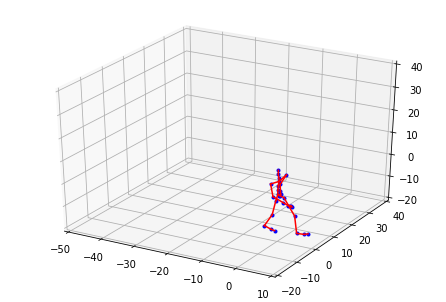

parsing ../data/05/05.asf
parsing ../data/05/05_01.amc


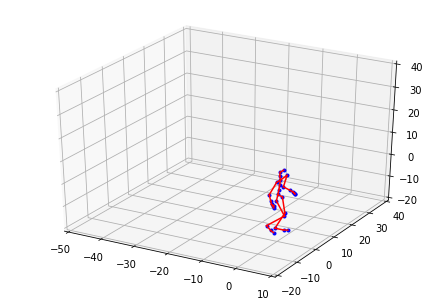

parsing ../data/06/06.asf
parsing ../data/06/06_01.amc


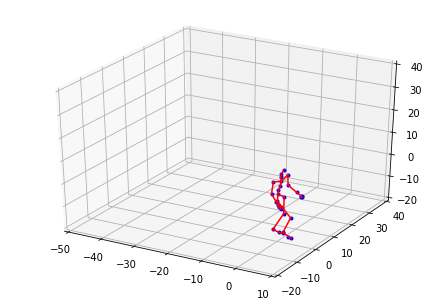

parsing ../data/07/07.asf
parsing ../data/07/07_01.amc


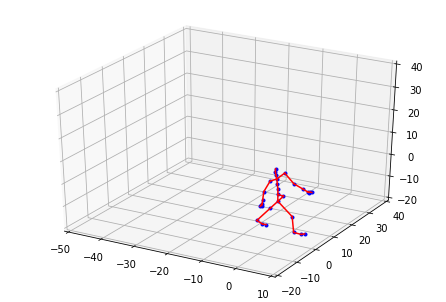

parsing ../data/08/08.asf
parsing ../data/08/08_01.amc


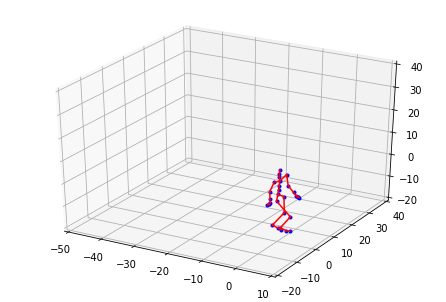

parsing ../data/10/10.asf
parsing ../data/10/10_04.amc


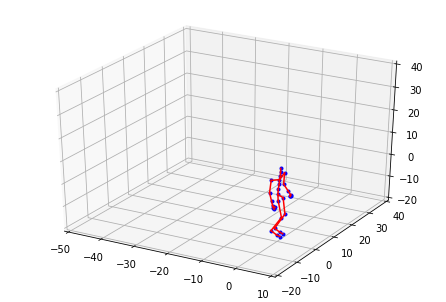

parsing ../data/12/12.asf
parsing ../data/12/12_01.amc


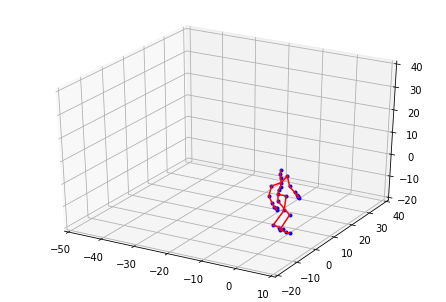

parsing ../data/16/16.asf
parsing ../data/16/16_15.amc


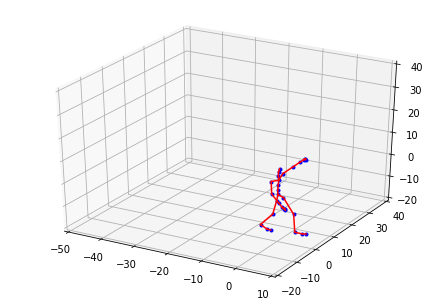

parsing ../data/26/26.asf
parsing ../data/26/26_01.amc


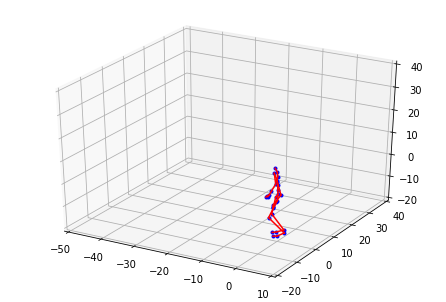

parsing ../data/27/27.asf
parsing ../data/27/27_01.amc


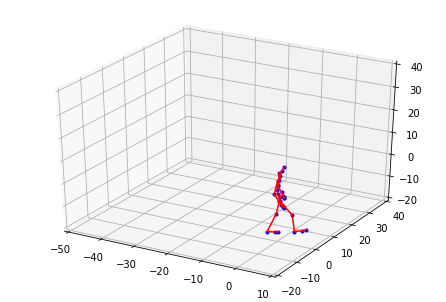

parsing ../data/29/29.asf
parsing ../data/29/29_01.amc


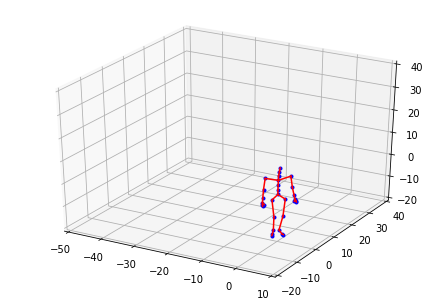

parsing ../data/32/32.asf
parsing ../data/32/32_01.amc


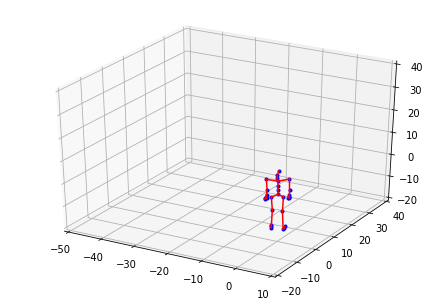

parsing ../data/35/35.asf
parsing ../data/35/35_01.amc


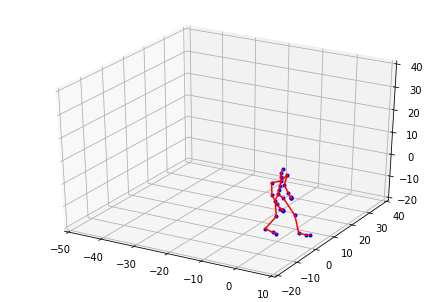

parsing ../data/37/37.asf
parsing ../data/37/37_01.amc


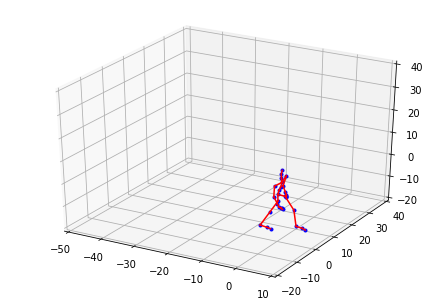

parsing ../data/38/38.asf
parsing ../data/38/38_01.amc


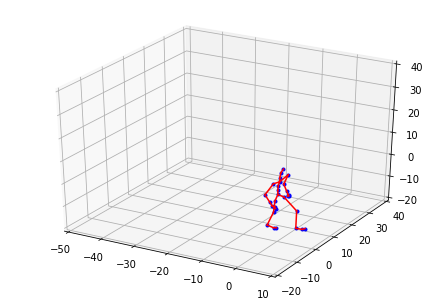

parsing ../data/39/39.asf
parsing ../data/39/39_01.amc


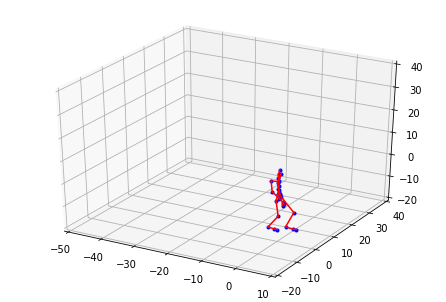

parsing ../data/43/43.asf
parsing ../data/43/43_01.amc


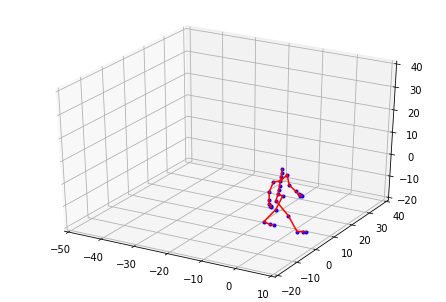

parsing ../data/46/46.asf
parsing ../data/46/46_01.amc


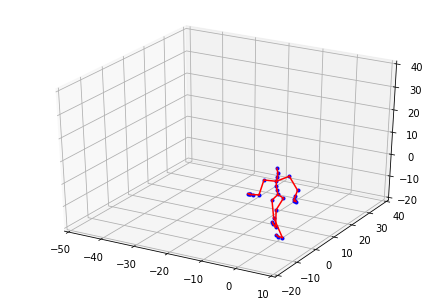

parsing ../data/49/49.asf
parsing ../data/49/49_01.amc


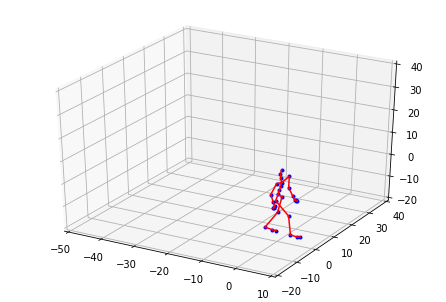

parsing ../data/55/55.asf
parsing ../data/55/55_04.amc


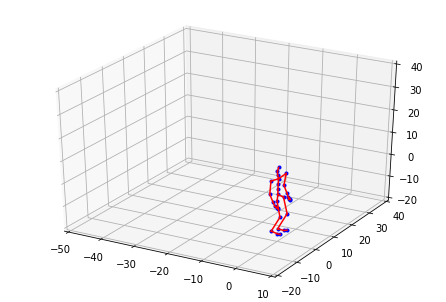

In [4]:
joints, motions = amc_parser.test_all()

### Parse and save to dataframe one person data

In [4]:
df = amc_parser.get_all_data(person_folder='../data/05/')

05_01.amc


In [5]:
df.head()

,lwrist_coord_0,lwrist_coord_1,lwrist_coord_2,lwrist_norm_coord_0,lwrist_norm_coord_1,lwrist_norm_coord_2,lwrist_angle_0,lwrist_angle_1,lwrist_angle_2,lwrist_norm_angle_0,...,rclavicle_motion_0,rclavicle_motion_1,rtibia_motion_0,thorax_motion_0,thorax_motion_1,thorax_motion_2,lfingers_motion_0,frame,amc_path,person
0,6.624466,15.072882,-33.509707,5.611926,-1.451018,1.310993,-0.258237,-0.526448,-0.974620,-0.489805,...,5.864150e-15,-2.067360e-14,61.0675,-0.989394,0.716381,-0.825246,7.12502,0,05_01.amc,05
0,6.641884,15.148123,-33.250561,5.610244,-1.363877,1.477639,-0.266190,-0.545941,-0.959447,-0.499002,...,-2.246270e-14,2.544440e-14,60.2588,-0.594445,0.655129,-0.391631,7.12502,1,05_01.amc,05
0,6.677781,15.191185,-33.104540,5.630271,-1.316115,1.514860,-0.279656,-0.563596,-0.946001,-0.506904,...,-1.316950e-14,-8.746530e-15,59.1469,-1.153680,0.699708,-0.708396,7.12502,2,05_01.amc,05
0,6.693159,15.252748,-32.831485,5.660229,-1.258552,1.720915,-0.291464,-0.578115,-0.933340,-0.527997,...,5.466580e-16,1.828820e-14,58.0698,-0.288579,0.256131,-0.043233,7.12502,3,05_01.amc,05
0,6.720794,15.310619,-32.729615,5.657794,-1.195081,1.692985,-0.305297,-0.596261,-0.920791,-0.532499,...,2.236330e-14,-1.073440e-14,56.7859,-0.556513,0.540161,-0.353442,7.12502,4,05_01.amc,05


## Walking Phases

Explore motion data to understand how to label walking phases 

In [6]:
d = df[df['amc_path'] == '05_01.amc']

lfoot_coord_2 - направление движения человека
rfoot_coord_0 - ширина шага
rfoot_coord_1 - высота подъема

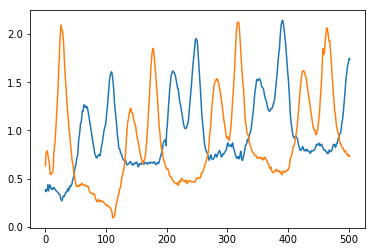

In [7]:
plt.plot(d['frame'], d['lfoot_coord_1'])
plt.plot(d['frame'], d['rfoot_coord_1'])

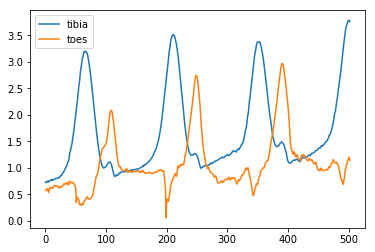

In [8]:
plt.plot(d['frame'], d['ltibia_coord_1'], label='tibia')
plt.plot(d['frame'], d['ltoes_coord_1'], label='toes')
plt.legend(loc=2)

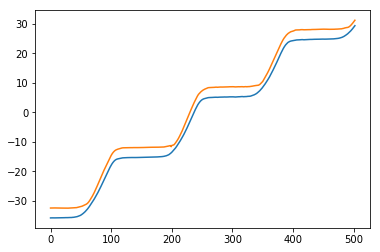

In [9]:
plt.plot(d['frame'], d['ltibia_coord_2'], label='tibia')
plt.plot(d['frame'], d['ltoes_coord_2'], label='toes')

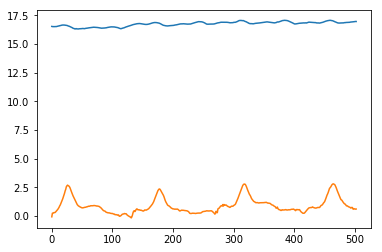

In [10]:
plt.plot(d['frame'], d['root_coord_1'])
plt.plot(d['frame'], d['rtoes_coord_1'])

чтобы получить размеры из данных amc - необходимо значнеие поделить 0.45 и умножить на 2.54 (т.е. перевести из дюймов в сантиметры)


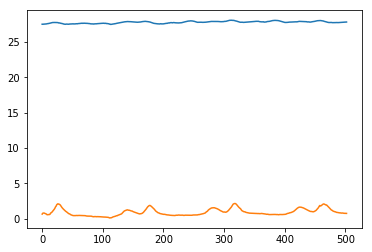

In [11]:
plt.plot(d['frame'], d['head_coord_1'])
plt.plot(d['frame'], d['rfoot_coord_1'])

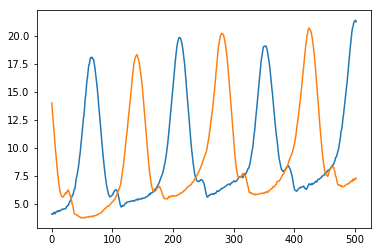

In [12]:
plt.plot(d['frame'], d['ltibia_coord_1']/0.45*2.54)
plt.plot(d['frame'], d['rtibia_coord_1']/0.45*2.54)

### Visualize motions

In [13]:
## функция для отрисовки скелета (основные точки)
# рисует один фрейм

def plot_frame(fr, z_shift=0):

    left_side_cols = [
        'head_coord_0', 'head_coord_1', 'head_coord_2',
        'upperneck_coord_0', 'upperneck_coord_1','upperneck_coord_2',
        'lclavicle_coord_0', 'lclavicle_coord_1','lclavicle_coord_2',
        'root_coord_0','root_coord_1','root_coord_2',
        'lhipjoint_coord_0', 'lhipjoint_coord_1', 'lhipjoint_coord_2', 
        'lfemur_coord_0', 'lfemur_coord_1', 'lfemur_coord_2',
        'ltibia_coord_0','ltibia_coord_1','ltibia_coord_2',
        'lfoot_coord_0','lfoot_coord_1','lfoot_coord_2',
        'ltoes_coord_0','ltoes_coord_1','ltoes_coord_2'
    ]

    right_side_cols = [
        'head_coord_0','head_coord_1','head_coord_2',
        'upperneck_coord_0','upperneck_coord_1','upperneck_coord_2',
        'rclavicle_coord_0','rclavicle_coord_1','rclavicle_coord_2',
        'root_coord_0','root_coord_1','root_coord_2',
        'rhipjoint_coord_0', 'rhipjoint_coord_1', 'rhipjoint_coord_2', 
        'rfemur_coord_0', 'rfemur_coord_1', 'rfemur_coord_2',
        'rtibia_coord_0','rtibia_coord_1','rtibia_coord_2',
        'rfoot_coord_0','rfoot_coord_1','rfoot_coord_2',
        'rtoes_coord_0','rtoes_coord_1','rtoes_coord_2'
    ]

    xs_cols = left_side_cols[::3]
    ys_cols = left_side_cols[1:][::3]
    zs_cols = left_side_cols[2:][::3]

    xs = fr[xs_cols].values
    ys = fr[ys_cols].values
    zs = fr[zs_cols].values + z_shift



    r_xs_cols = right_side_cols[::3]
    r_ys_cols = right_side_cols[1:][::3]
    r_zs_cols = right_side_cols[2:][::3]

    r_xs = fr[r_xs_cols].values
    r_ys = fr[r_ys_cols].values
    r_zs = fr[r_zs_cols].values + z_shift

    trace1 = go.Scatter3d(
        x=xs[0, :],
        y=ys[0, :],
        z=zs[0, :],
        mode='lines+markers',
        text=xs_cols,
        line=dict(
            color='#1f77b4',
            width=3
        ),
        marker=dict(
            size=5,
            color = xs[0, :], #set color equal to a variable
            colorscale='Viridis',
            showscale=True
        )
    )

    trace2 = go.Scatter3d(
        x=r_xs[0, :],
        y=r_ys[0, :],
        z=r_zs[0, :],
        mode='lines+markers',
        text=r_xs_cols,
        line=dict(
            color='#1f77b4',
            width=3
        ),
        marker=dict(
            size=5,
            color = r_xs[0, :], #set color equal to a variable
            colorscale='Viridis',
            showscale=True
        )
    )

    return [trace1, trace2]


## функция для отрисовки скелета (основные точки)
# рисует список фреймов frames_n, каждый следующий фрейм сдвигает по оси z на z_shift

def plot_series(d, frames_n, z_shift=10):
    
    all_tr = []
    
    for i in range(len(frames_n)):
        fr_n = frames_n[i]
        fr =  d[d['frame'] == fr_n]
        tr = plot_frame(fr, z_shift*i)
        all_tr.extend(tr)
        

    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        autosize=False,
        width=1000,
        height=500,
        showlegend=False 
    )
    return py.iplot(go.Figure(data=all_tr, layout=layout), filename='3d-scatter-colorscale')



## функция для двумерной отрисовки нулевой координаты ног
def plot_legs(d, frames_n=None):
    
    if frames_n is None:
        d1 = d
    else:
        min_fr = np.array(frames_n).min()
        max_fr = np.array(frames_n).max()
        d1 = d[(d['frame'] > min_fr) & (d['frame'] < max_fr)]
    
    data = [
        go.Scatter(
            x=d1['frame'],
            y=d1['rfoot_coord_1'],
            mode='lines+markers',
            name='rfoot',
            line=dict(
                width=3
            )
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['lfoot_coord_1'],
            mode='lines+markers',
            name='lfoot',
            line=dict(
                width=3
            )
        ),
        go.Scatter(
            x=d1['frame'],
            y=d1['rtibia_coord_1'],
            mode='lines+markers',
            name='rtibia',
            line=dict(
                width=3
            )
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['ltibia_coord_1'],
            mode='lines+markers',
            name='ltibia',
            line=dict(
                width=3
            )
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['ltoes_coord_1'],
            mode='lines+markers',
            name='ltoes'
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['rtoes_coord_1'],
            mode='lines+markers',
            name='rtoes', 
            line=dict(
                width=3
            )
        )
    ]

    fig = go.Figure(data=data)
    return py.iplot(fig, filename='hover-chart-basic')    

In [14]:
frames_to_look = np.arange(282, 430, 15)

In [15]:
plot_series(d, frames_n=frames_to_look, z_shift=20)

In [16]:
plot_legs(d, frames_n=frames_to_look)

### Create target

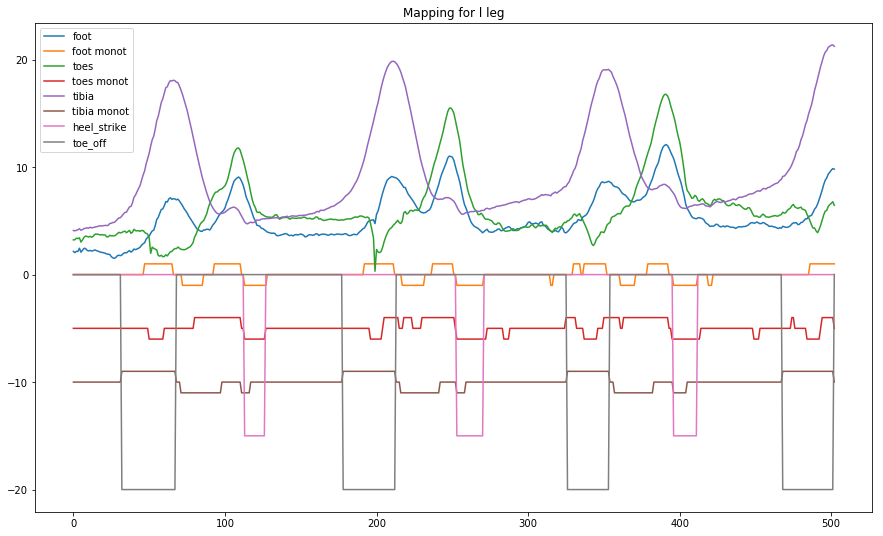

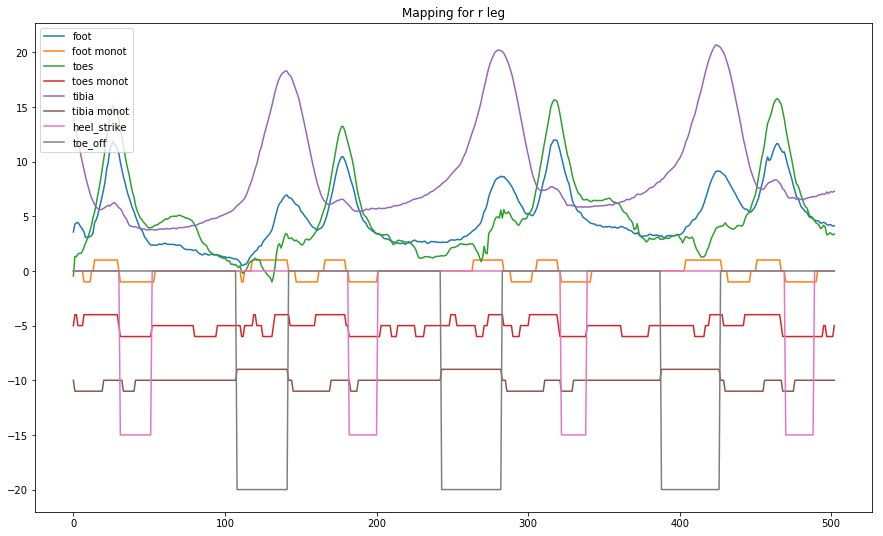

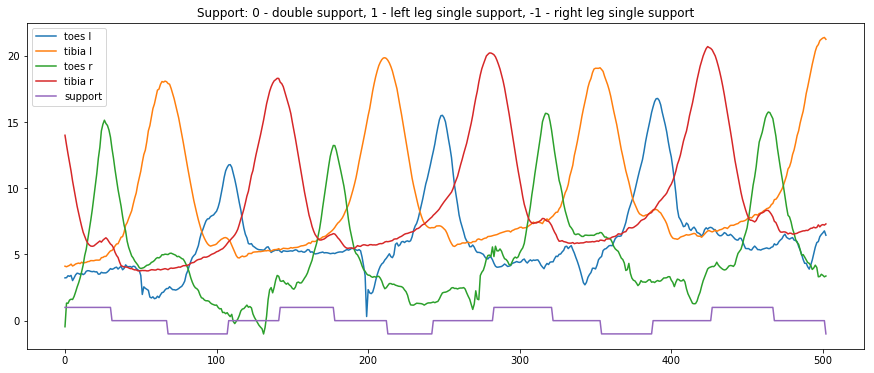

In [18]:
cr_target = target.CreateTarget(win=10, der_thr=0.1, tibia_delta=0.1)
d1 = cr_target.evaluate(d, plot=True, savefig='../output/foo.png')

## Parse and create target for all avalable data

In [33]:
source_data_path = '../data/'
output_data_path = '../output/parsed_data/'
output_img_path = '../output/img_phases/'

In [42]:
persons_folders = os.listdir(source_data_path)

In [43]:
for folder in tqdm.tqdm_notebook(persons_folders):
    
    # parse one person data
    full_folder = source_data_path + folder + '/'
    df = amc_parser.get_all_data(person_folder=full_folder)
    
    amc_files = df['amc_path'].unique()
    
    # for each amc file map target and save
    for amc_path in amc_files:
        d = df[df['amc_path'] == amc_path]
        data_path = output_data_path + amc_path.replace('.amc', '') + '.csv'
        img_path = output_img_path + amc_path.replace('.amc', '') + '.png'
        cr_target = target.CreateTarget(win=10, der_thr=0.2, tibia_delta=0.1, smooth_max_v=15)
        d1 = cr_target.evaluate(d, plot=False, savefig=img_path)
        d1.to_csv(data_path, index=False)

#### Check specific amc

In [55]:
full_folder = source_data_path + '35' + '/'
df = amc_parser.get_all_data(person_folder=full_folder)

In [56]:
df.amc_path.unique()

array(['35_32.amc', '35_12.amc', '35_16.amc', '35_11.amc', '35_07.amc',
       '35_34.amc', '35_31.amc', '35_30.amc', '35_29.amc', '35_13.amc',
       '35_05.amc', '35_10.amc', '35_28.amc', '35_02.amc', '35_15.amc',
       '35_14.amc', '35_01.amc', '35_08.amc', '35_09.amc', '35_33.amc'], dtype=object)

In [57]:
amc_path = '35_33.amc'

In [58]:
d = df[df['amc_path'] == amc_path]

In [59]:
data_path = output_data_path + amc_path.replace('.amc', '') + '.csv'
img_path = output_img_path + amc_path.replace('.amc', '') + '.png'

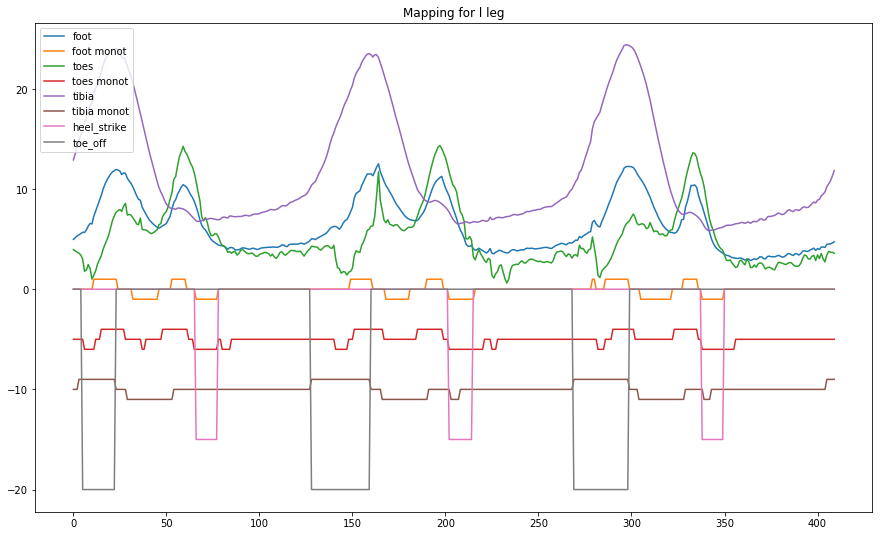

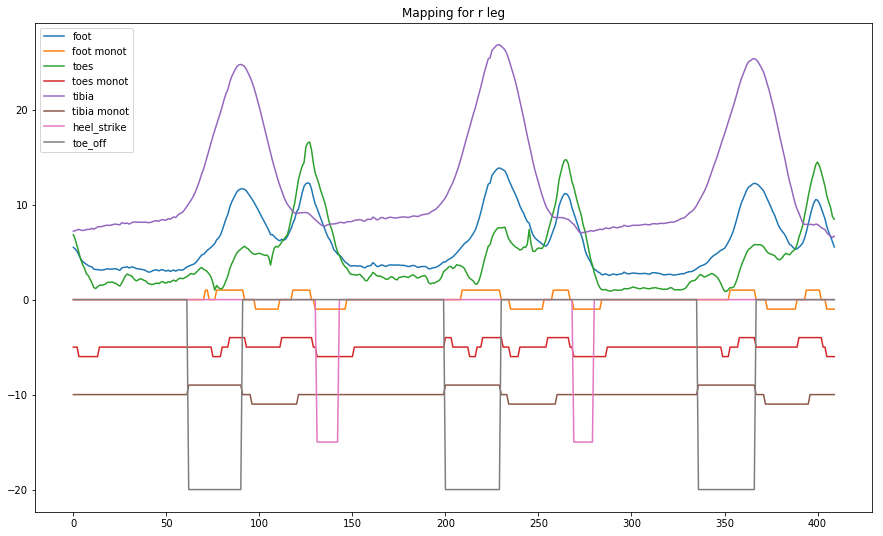

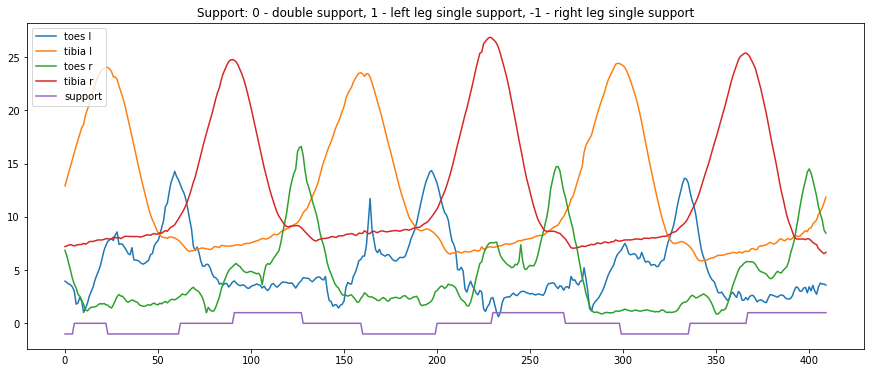

In [61]:
cr_target = target.CreateTarget(win=10, der_thr=0.2, tibia_delta=0.1, smooth_max_v=15)
d1 = cr_target.evaluate(d, plot=True, savefig=None)

In [62]:
d1 = cr_target.evaluate(d, plot=False, savefig=img_path)

In [63]:
d1.to_csv(data_path, index=False)